In [1]:
# Import required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Import the dataset
data = pd.read_csv('data/suv_data.csv')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Analysing data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

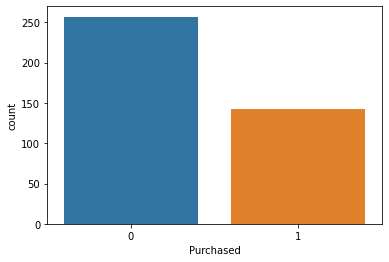

In [3]:
sns.countplot(x = 'Purchased', data = data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

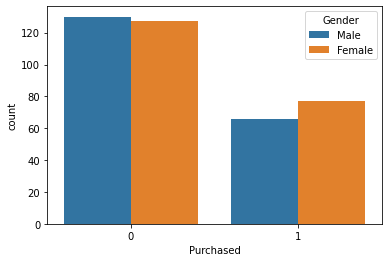

In [4]:
sns.countplot(x = 'Purchased', data = data, hue = 'Gender')

<AxesSubplot:ylabel='Frequency'>

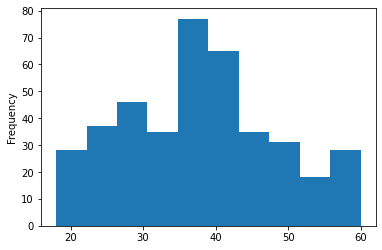

In [9]:
data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

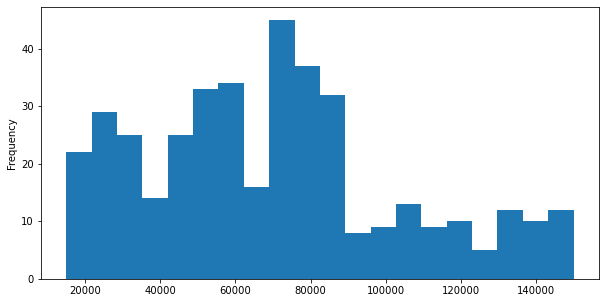

In [12]:
data['EstimatedSalary'].plot.hist(bins = 20, figsize = (10, 5))

<AxesSubplot:xlabel='Age', ylabel='count'>

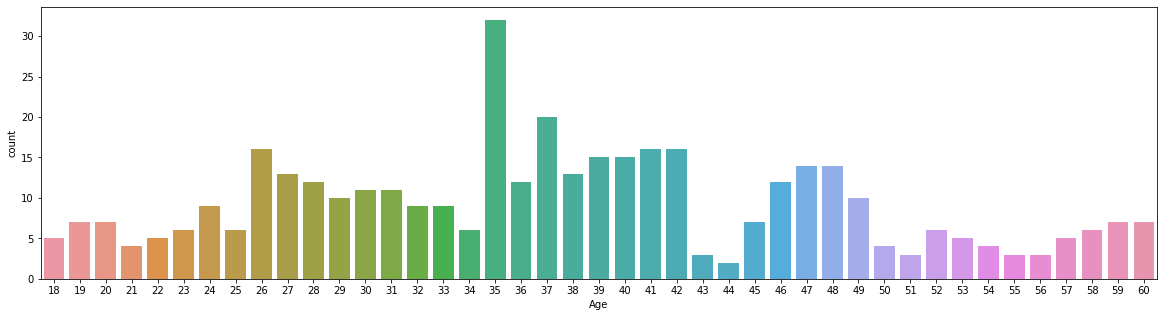

In [21]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Age', data = data)

## Data Wrangling

In [23]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

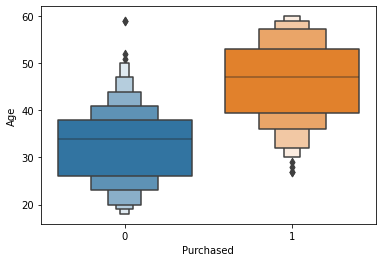

In [26]:
sns.boxenplot(x = 'Purchased', y = 'Age', data = data)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

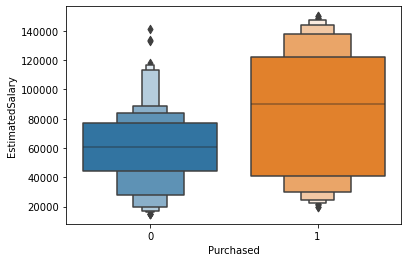

In [28]:
sns.boxenplot(x = 'Purchased', y = 'EstimatedSalary', data = data)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [39]:
Sex = pd.get_dummies(data['Gender'], drop_first = True)
Sex

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [40]:
data['Sex'] = Sex
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Sex
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [41]:
data.drop(['User ID', 'Gender'], axis = 1, inplace = True)
data.head(5)

,Age,EstimatedSalary,Purchased,Sex
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


## Model

In [43]:
from sklearn.model_selection import train_test_split

In [55]:
X = data.iloc[:, [0, 1, 3]].values
y = data.iloc[:, 2].values

In [54]:
y

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

In [59]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression

In [62]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [63]:
pred = classifier.predict(X_test)

In [67]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [66]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        80
           1       0.97      0.63      0.77        52

    accuracy                           0.85       132
   macro avg       0.89      0.81      0.83       132
weighted avg       0.87      0.85      0.84       132



In [70]:
cm = confusion_matrix(y_test, pred)
cm

array([[79,  1],
       [19, 33]], dtype=int64)

<AxesSubplot:>

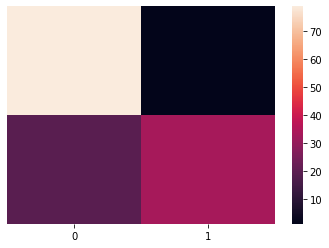

In [71]:
sns.heatmap(cm, yticklabels = False)

In [74]:
accuracy_score(y_test, pred)

0.8484848484848485